#### Importing packages

In [605]:
import pandas as pd
import seaborn as sns

#### Creating Dataframe

In [606]:
nyc_trees = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv", parse_dates=["created_at"])
print(nyc_trees.isna().sum())
print(nyc_trees.dtypes)
print(nyc_trees.columns)
nyc_trees.drop_duplicates(inplace=True)

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

#### Removing columns wich are useless for Machine Learning

In [607]:
nyc_trees.drop(columns=["block_id","tree_id", "spc_common", "problems","borocode","cncldist","community board","st_assem","st_senate","boro_ct","state","council district","census tract","bin","bbl"], axis=1, inplace=True)

#### Checking out NaN's

In [608]:
nan = nyc_trees[nyc_trees["health"].isna() == True]
nan = nan.drop_duplicates(["health","spc_latin"])


### Exploring column by column


#### tree_dbh

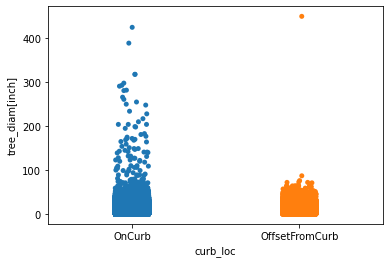

In [609]:
# Changing column name
nyc_trees.rename(columns={"tree_dbh":"tree_diam[inch]","stump_diam":"stump_diam[inch]"},inplace=True)

# Outliers in column to None
sns.stripplot(data=nyc_trees, x="curb_loc", y="tree_diam[inch]", jitter=True)
tree_dbh_lst = nyc_trees[nyc_trees["tree_diam[inch]"] >= 80].index
nyc_trees.loc[tree_dbh_lst, "tree_diam[inch]"] = None



#### Changing tree_diam and stump_diam columns.
* If stump, remove from tree_diam, replace with None
* If tree, remove value from stump_diam, replace with None

In [610]:
nyc_trees.status.value_counts()
stumps_lst = nyc_trees[nyc_trees["status"] == "Stump"].index
alive_lst = nyc_trees[nyc_trees["status"] == "Alive"].index
nyc_trees.loc[stumps_lst, "tree_diam[inch]"] = None
nyc_trees.loc[alive_lst, "stump_diam[inch]"] = None

# Replacing 0's in stump_diam with None
def zero_to_none(x:float):
    if x == 0:
        return None
    else:
        return x

nyc_trees["stump_diam[inch]"] = nyc_trees["stump_diam[inch]"].apply(lambda x: zero_to_none(x))

#### curb_loc

In [611]:
# Should contain 2 categories
nyc_trees.curb_loc.value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

#### status

In [612]:
# Should contain 3 categories
nyc_trees.status.value_counts()


Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

#### health

In [613]:
# Should contain 3 categories.
nyc_trees["health"].value_counts()


Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

#### spc_latin - spc_common

In [614]:
# Checking if these columns always compare
print(nyc_trees.spc_latin.value_counts())

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 132, dtype: int64


#### steward

In [615]:
print(nyc_trees["steward"].sample(30))

# turning into int type
def steward_int(word):
    if word is None:
        return None
    elif word == "None":
        return 0
    elif type(word) == float:
        return word
    else:
        return int(word[0])

nyc_trees["steward"] = nyc_trees["steward"].apply(lambda x: steward_int(x))
print(nyc_trees["steward"].sample(30))

429860    None
476932    None
277587    None
13808     None
538519    None
610892     NaN
571139    None
468402    None
474798    1or2
270367    1or2
105314    None
567844    None
269824    None
81211     None
283899    None
543916    None
118087    1or2
338621    None
238881    None
279668    None
359490    1or2
49185     None
154395    None
465151     NaN
632210    None
247000    None
409421    None
425927    None
35892     None
224335    None
Name: steward, dtype: object
219007    0.0
231079    0.0
102585    1.0
140259    0.0
186929    0.0
193367    0.0
269707    0.0
277763    0.0
461662    0.0
599339    1.0
292708    0.0
401480    0.0
516134    1.0
437047    0.0
449171    1.0
320639    0.0
252060    0.0
562353    1.0
253218    0.0
18539     0.0
84229     0.0
412889    0.0
174088    1.0
569114    0.0
218511    0.0
319936    1.0
518840    0.0
445182    1.0
647946    1.0
632969    1.0
Name: steward, dtype: float64


#### guards

In [616]:
print(nyc_trees["guards"].value_counts())

None       572306
Helpful     51866
Harmful     20252
Unsure       7748
Name: guards, dtype: int64


In [617]:
# Clean the None for Unsure
def guards_cleaning(dead_or_alive:str, guards:str):
    if guards == "None" and dead_or_alive == "Alive":
        return "Unsure"
    else:
        return guards

nyc_trees["guards"] = nyc_trees.apply(lambda row: guards_cleaning(row["status"],row["guards"]), axis=1)


In [618]:
print(nyc_trees.columns)


Index(['created_at', 'tree_diam[inch]', 'stump_diam[inch]', 'curb_loc',
       'status', 'health', 'spc_latin', 'steward', 'guards', 'sidewalk',
       'user_type', 'root_stone', 'root_grate', 'root_other', 'trunk_wire',
       'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other',
       'address', 'postcode', 'zip_city', 'borough', 'nta', 'nta_name',
       'latitude', 'longitude', 'x_sp', 'y_sp'],
      dtype='object')


#### sidewalk

In [619]:
# Changing column name to sidewalk_damaged
nyc_trees = nyc_trees.rename(columns={"sidewalk":"sidewalk_damaged"})

# Changing values to boolean
def sidewalk_bool(word):
    if word == "Damage":
        return True
    else:
        return False

nyc_trees["sidewalk_damaged"] = nyc_trees["sidewalk_damaged"].apply(lambda x: sidewalk_bool(x))
nyc_trees.sidewalk_damaged.value_counts()

False    496594
True     187194
Name: sidewalk_damaged, dtype: int64

#### user_type

In [620]:
nyc_trees.user_type.value_counts()

TreesCount Staff    296284
Volunteer           217518
NYC Parks Staff     169986
Name: user_type, dtype: int64

#### root_stone

In [621]:
# Function to change yes/no to True/False
def yes_no_to_bool(yn:str):
    yn = yn.lower()
    if yn == "yes":
        return True
    elif yn == "no":
        return False

# Changing yes/no to boolean:
nyc_trees.root_stone = nyc_trees.root_stone.apply(lambda x: yes_no_to_bool(x))

#### root_grate

In [622]:
# Changing yes/no to boolean:
nyc_trees.root_grate = nyc_trees.root_grate.apply(lambda x: yes_no_to_bool(x))

#### root_other


In [623]:
# Changing yes/no to boolean:
nyc_trees.root_other = nyc_trees.root_other.apply(lambda x: yes_no_to_bool(x))

#### Changing columns names: all trnk_ columns with trunk_

In [624]:
nyc_trees = nyc_trees.rename(columns={"trnk_wire":"trunk_wire", "trnk_light":"trunk_light","trnk_other":"trunk_other"})

#### trunk_wire

In [625]:
# Changing yes/no to boolean:
nyc_trees.trunk_wire = nyc_trees.trunk_wire.apply(lambda x: yes_no_to_bool(x))

#### trunk_light

In [626]:
# Changing yes/no to boolean:
nyc_trees.trunk_light = nyc_trees.trunk_light.apply(lambda x: yes_no_to_bool(x))

#### trunk_other

In [627]:
# Changing yes/no to boolean:
nyc_trees.trunk_other = nyc_trees.trunk_other.apply(lambda x: yes_no_to_bool(x))

#### Changing columns names: all trnk_ columns with trunk_

In [628]:
nyc_trees = nyc_trees.rename(columns={"brch_light":"branch_light","brch_shoe":"branch_shoe","brch_other":"branch_other"})

#### branch_light

In [629]:
# Changing yes/no to boolean:
nyc_trees.branch_light = nyc_trees.branch_light.apply(lambda x: yes_no_to_bool(x))

#### branch_shoe

In [630]:
# Changing yes/no to boolean:
nyc_trees.branch_shoe = nyc_trees.branch_shoe.apply(lambda x: yes_no_to_bool(x))

#### branch_other

In [631]:
# Changing yes/no to boolean:
nyc_trees.branch_other = nyc_trees.branch_other.apply(lambda x: yes_no_to_bool(x))


In [632]:
nyc_trees = nyc_trees.reset_index(drop=True)
nyc_trees.head(324000).to_csv("final.csv")

In [633]:
print(nyc_trees.shape)
print(nyc_trees.head())
print(nyc_trees.dtypes)


(683788, 30)
  created_at  tree_diam[inch]  stump_diam[inch] curb_loc status health  \
0 2015-08-27              3.0               NaN   OnCurb  Alive   Fair   
1 2015-09-03             21.0               NaN   OnCurb  Alive   Fair   
2 2015-09-05              3.0               NaN   OnCurb  Alive   Good   
3 2015-09-05             10.0               NaN   OnCurb  Alive   Good   
4 2015-08-30             21.0               NaN   OnCurb  Alive   Good   

                            spc_latin  steward  guards  sidewalk_damaged  ...  \
0                         Acer rubrum      0.0  Unsure             False  ...   
1                   Quercus palustris      0.0  Unsure              True  ...   
2  Gleditsia triacanthos var. inermis      1.0  Unsure              True  ...   
3  Gleditsia triacanthos var. inermis      0.0  Unsure              True  ...   
4                     Tilia americana      0.0  Unsure              True  ...   

             address  postcode      zip_city   borough 